#Práctica Deep Learning: Juan Manuel Cebrián Robles

##Cargamos datos

In [ ]:
# Dataset: https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&refine.country=Spain&q=Madrid


# Direct link

# https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B

In [1]:
# Descargamos el dataset
!wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"

--2021-02-27 21:26:06--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.249.199.226, 34.248.20.69
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.249.199.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘airbnb-listings.csv’

airbnb-listings.csv     [  <=>               ]  54.19M  2.69MB/s    in 21s     

2021-02-27 21:26:29 (2.63 MB/s) - ‘airbnb-listings.csv’ saved [56825724]



In [ ]:
# comprobamos que es lo que nos hemos descargado
!ls -ll

total 126044
-rw-r--r-- 1 root root 56825724 Feb  7 16:42 airbnb-listings.csv
-rw-r--r-- 1 root root 15052928 Feb  7 11:36 images.npy
drwxr-xr-x 1 root root     4096 Feb  4 15:26 sample_data
-rw-r--r-- 1 root root 11364890 Feb  7 13:33 test.csv
-rw-r--r-- 1 root root 45806627 Feb  7 13:33 train.csv
-rw-r--r-- 1 root root      928 Feb  7 11:36 was_loaded.npy


In [ ]:
# Leemos el dataset usando pandas y vemos las primeras filas
import pandas as pd
data = pd.read_csv('airbnb-listings.csv', sep = ';',decimal='.')
data.head(3)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,15141125,https://www.airbnb.com/rooms/15141125,20170407214119,2017-04-08,Panoramic charming studio!,"Charming bright and cosy studio in ""El Rastro""...",It's a bright and cosy studio located in the h...,"Charming bright and cosy studio in ""El Rastro""...",none,The studio is located in the remarkable neighb...,NaN,The closest metro is La latina which will take...,The full studio will be entirely to the guests...,I am delighted to preform the check in at the ...,NaN,https://a0.muscache.com/im/pictures/d1a2212d-c...,https://a0.muscache.com/im/pictures/d1a2212d-c...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/d1a2212d-c...,96019257,https://www.airbnb.com/users/show/96019257,Marina,2016-09-20,"Madrid, Community of Madrid, Spain",I have a serious addiction for traveling :0l! ...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/fffbb86e-5...,https://a0.muscache.com/im/pictures/fffbb86e-5...,NaN,2.0,2.0,"email,phone,facebook,reviews,jumio,government_id","Madrid, Comunidad de Madrid 28005, Spain",NaN,Embajadores,Centro,Madrid,Comunidad de Madrid,28005,Madrid,"Madrid, Spain",ES,Spain,40.407453,-3.707995,Loft,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Pets all...",NaN,50.0,NaN,NaN,100.0,20.0,2,15,2,1125,today,NaN,13,24,42,66,2017-04-07,30,2016-10-15,2017-03-31,96.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,moderate,2,5.11,"40.4074526848,-3.70799547544","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,9470166,https://www.airbnb.com/rooms/9470166,20170407214119,2017-04-08,Comfortable penthouse in the center,"In the center, recently remodeled, comfortable...",Quiet and comfortable space where you can rela...,"In the center, recently remodeled, comfortable...",none,It belongs to the district center of Madrid wh...,A la misma distancia en tiempo podrás acceder ...,"The nearest Metro station is Tirso de Molina ,...","You will be alone, while you are in my flat an...",If you have any questions while you are in the...,Check ins after 21h to 22h have an extra cost ...,https://a0.muscache.com/im/pictures/3eb59287-8...,https://a0.muscache.com/im/pictures/3eb59287-8...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/3eb59287-8...,9885245,https://www.airbnb.com/users/show/9885245,Jorge,2013-11-08,"Madrid, Community of Madrid, Spain",NaN,within an hour,100.0,NaN,https://a0.muscache.com/im/users/9885245/profi...,https://a0.muscache.com/im/users/9885245/profi...,Hortaleza,13.0,13.0,"email,phone,reviews,jumio","Madrid, Comunidad de Madrid 28012, Spain",NaN,Embajadores,Centro,Madrid,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,40.408316,-3.705006,Apartment,Entire home/apt,4,

In [ ]:
# Comprobamos el tamaño
data.shape

(14001, 89)

In [ ]:
# vemos el nombre de las variables
data.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

## Usando el filtro de limpieza de la practica de Machine Leaning

### Importando librerias y funciones necesarias

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None) #para que se muestren todas las filas cuando hacemos head()
pd.set_option('display.max_columns', None) #para que se muestren todas las columnas cuando hacemos head()

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

### Limpiando datos

In [ ]:
data_clean=data

In [ ]:
"""from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')
# Guardamos
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

df = pd.read_csv('./train.csv', sep=';', decimal='.')"""

"from sklearn.model_selection import train_test_split\n\ntrain, test = train_test_split(data, test_size=0.2, shuffle=True, random_state=0)\n\nprint(f'Dimensiones del dataset de training: {train.shape}')\nprint(f'Dimensiones del dataset de test: {test.shape}')\n# Guardamos\ntrain.to_csv('./train.csv', sep=';', decimal='.', index=False)\ntest.to_csv('./test.csv', sep=';', decimal='.', index=False)\n\n# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. \n\ndf = pd.read_csv('./train.csv', sep=';', decimal='.')"

In [ ]:
from datetime import datetime

irrelevant_columns=['ID','Listing Url','Scrape ID','Last Scraped','Medium Url','Picture Url','XL Picture Url','Host ID','Host URL','Host Name','Host Thumbnail Url','Host Picture Url','Host Neighbourhood','Host Listings Count','Host Total Listings Count','Calendar Updated','Calendar last Scraped','First Review','Last Review','Geolocation','Calculated host listings count']

relevants_but_droppable_columns= ['Name', 'Summary', 'Space', 'Description','Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules','Host Location', 'Host About']

columnas_mas30_NaN= ['Host Acceptance Rate', 'Neighbourhood', 'Square Feet', 'Weekly Price',
       'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Has Availability', 'License', 'Jurisdiction Names']

data_clean.drop(irrelevant_columns, axis=1, inplace=True)
data_clean.drop(relevants_but_droppable_columns, axis=1, inplace=True)
data_clean.drop(columnas_mas30_NaN, axis=1, inplace=True)

data_clean.drop(['Experiences Offered'], axis=1, inplace=True)
data_clean.drop(['Street'], axis=1, inplace=True)
data_clean.drop(['City', 'State', 'Market', 'Country', 'Country Code'], axis=1, inplace=True)

reviews = data_clean.loc[: , "Review Scores Rating":"Review Scores Value"]
data_clean['Average Review'] = reviews.mean(axis=1)

data_clean.drop(['Accommodates','Availability 30', 'Availability 60', 'Availability 90', 'Review Scores Rating', 
         'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'Reviews per Month'
        ], axis=1, inplace=True)

data_clean.drop(['Neighbourhood Cleansed', 'Neighbourhood Group Cleansed'
         ,'Zipcode','Smart Location'
        ], axis=1, inplace=True)

data_clean = data_clean[data_clean['Price'] <= 200]
data_clean = data_clean[data_clean['Bathrooms'] <= 5]
data_clean = data_clean[data_clean['Bedrooms'] <= 6]
data_clean = data_clean[data_clean['Extra People'] <= 50]

data_clean['Features'].fillna("", inplace=True) # rellenamos los huecos con cadenas vacías
data_clean['Amenities'].fillna("", inplace=True)
data_clean['Host Verifications'].fillna("", inplace=True)

data_clean['Features'] = data_clean['Features'].apply(lambda x: len(str(x).split(',')))
data_clean['Amenities'] = data_clean['Amenities'].apply(lambda x: len(str(x).split(',')))
data_clean['Host Verifications'] = data_clean['Host Verifications'].apply(lambda x: len(str(x).split(',')))

data_clean.dropna(subset=['Host Since'], inplace=True)
data_clean['Host Since'] = data_clean['Host Since'].apply(lambda x: datetime.strptime(str(x),'%Y-%m-%d'))
data_clean['Years Being Host'] = data_clean['Host Since'].apply(lambda x: 2017 - x.year)
data_clean.drop(['Host Since'], axis=1, inplace=True)

data_clean = data_clean[data_clean['Bathrooms'] != 0]


data_clean["Host Response Time"].fillna(df["Host Response Time"].mode()[0], inplace=True)




In [ ]:
data_clean.head()

,Thumbnail Url,Host Response Time,Host Response Rate,Host Verifications,Latitude,Longitude,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 365,Number of Reviews,Cancellation Policy,Features,Average Review,Years Being Host
0,https://a0.muscache.com/im/pictures/d1a2212d-c...,within an hour,100.0,6,40.407453,-3.707995,Loft,Entire home/apt,1.0,0.0,1.0,Real Bed,15,50.0,2,15,2,1125,66,30,moderate,5,22.285714,1
1,https://a0.muscache.com/im/pictures/3eb59287-8...,within an hour,100.0,4,40.408316,-3.705006,Apartment,Entire home/apt,1.0,1.0,2.0,Real Bed,16,50.0,2,25,1,1125,347,97,strict,4,18.857143,4
2,https://a0.muscache.com/im/pictures/de09fac7-9...,within an hour,100.0,7,40.413722,-3.706823,Apartment,Entire home/apt,1.5,1.0,2.0,Real Bed,18,77.0,1,0,1,1125,155,7,moderate,4,21.000000,0
3,NaN,within a few hours,100.0,5,40.411263,-3.697305,Apartment,Entire home/apt,1.0,1.0,2.0,Real Bed,10,50.0,1,20,7,1125,191,6,strict,4,21.285714,5
4,https://a0.muscache.com/im/pictures/6136974/57...,within an hour,100.0,5,40.412556,-3.701155,Apartment,Entire home/apt,1.0,2.0,4.0,Real Bed,10,95.0,4,0,4,1125,237,72,strict,5,22.428571,5


In [ ]:
data_clean.shape

(13292, 24)

##Extraemos las imagenes en un array

In [ ]:
import imageio as io
import numpy as np
import cv2
n_images = 100
images = np.zeros((n_images, 224, 224, 3), dtype=np.uint8)
urls = data_clean['Thumbnail Url']


i_aux = 0
good_urls = []
for i_img, url in enumerate(urls):
    if len(good_urls) >= n_images: #Parará cuando tengamos las n_imagenes imagenes
        break
    try:
        img = io.imread(url)
        images[i_aux] = cv2.resize(img, (224, 224))
        good_urls.append(i_img)
        i_aux += 1
        print(f'Imagen {i_img} descargada')
    except IOError as err:
        pass


Imagen 0 descargada
Imagen 1 descargada
Imagen 2 descargada
Imagen 4 descargada
Imagen 7 descargada
Imagen 11 descargada
Imagen 13 descargada
Imagen 15 descargada
Imagen 16 descargada
Imagen 17 descargada
Imagen 21 descargada
Imagen 23 descargada
Imagen 24 descargada
Imagen 25 descargada
Imagen 26 descargada
Imagen 27 descargada
Imagen 28 descargada
Imagen 29 descargada
Imagen 30 descargada
Imagen 31 descargada
Imagen 32 descargada
Imagen 33 descargada
Imagen 34 descargada
Imagen 35 descargada
Imagen 36 descargada
Imagen 37 descargada
Imagen 38 descargada
Imagen 39 descargada
Imagen 40 descargada
Imagen 41 descargada
Imagen 43 descargada
Imagen 44 descargada
Imagen 45 descargada
Imagen 46 descargada
Imagen 47 descargada
Imagen 48 descargada
Imagen 49 descargada
Imagen 50 descargada
Imagen 51 descargada
Imagen 52 descargada
Imagen 53 descargada
Imagen 54 descargada
Imagen 55 descargada
Imagen 56 descargada
Imagen 57 descargada
Imagen 58 descargada
Imagen 59 descargada
Imagen 60 descarga

In [ ]:
# mantenemos los datos numéricos solo para aquellos pisos que tienen imágenes 
# y las hemos obtenido
final_data = data.iloc[good_urls, :]
final_data.shape

(100, 24)

## Etiquetas

In [ ]:
# Seleccionamos el precio como etiqueta
y_reg = final_data['Price']

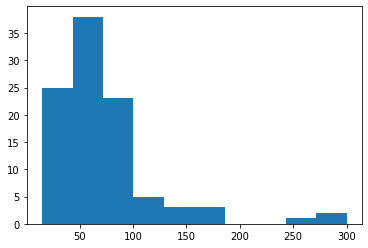

In [ ]:
# Mostramos la grafica del precio
import matplotlib.pyplot as plt
plt.hist(y_reg, bins=10)
plt.show()

In [ ]:
# Creamos un rango para convertirlo en una tarea de clasificacion
# Del 1 al 3: Barato, asequible y caro

y_class = []
for x in y_reg:
   # Barato
    if x <= 50:
        y_class.append(0)
    # Aseguible
    elif x <=150:
        y_class.append(1)
   # Caro
    else:
        y_class.append(2)

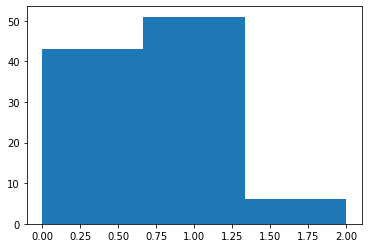

In [ ]:
# Veamos la grafica con las nuevas etiquetas
plt.hist(y_class, bins=3)
plt.show()


##Regresión con dataset numérico

In [ ]:
columnas_numericas = ['Bathrooms', 'Bedrooms', 'Beds',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Number of Reviews']
data_numerica = final_data.loc[:, columnas_numericas]
data_numerica.shape

(100, 8)

In [ ]:
data_numerica.head()

,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews
0,1.0,0.0,1.0,2,15,2,1125,30
1,1.0,1.0,2.0,2,25,1,1125,97
2,1.5,1.0,2.0,1,0,1,1125,7
4,1.0,2.0,4.0,4,0,4,1125,72
7,1.5,1.0,1.0,1,0,1,1125,2


In [ ]:
# Estandarizamos los valores
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_scaler = scaler.fit_transform(data_numerica)

In [ ]:
data_numerica.iloc[:] = numerical_scaler
data_numerica.head(5)

,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews
0,-0.457059,-1.671776,-0.828325,0.180024,0.751772,-0.138509,0.311951,-0.045228
1,-0.457059,-0.355417,0.072028,0.180024,1.882257,-0.571348,0.311951,1.575252
2,0.605869,-0.355417,0.072028,-0.767471,-0.943955,-0.571348,0.311951,-0.601512
4,-0.457059,0.960942,1.872734,2.075014,-0.943955,0.727171,0.311951,0.970595
7,0.605869,-0.355417,-0.828325,-0.767471,-0.943955,-0.571348,0.311951,-0.722444


In [ ]:
data_numerica.shape

(100, 8)

### Procesamos variables categóricas

In [ ]:
data_categorica = final_data[['Host Response Time', 'Property Type', 'Room Type', 'Bed Type', 'Cancellation Policy']]
data_categorica.head(5)

,Host Response Time,Property Type,Room Type,Bed Type,Cancellation Policy
0,within an hour,Loft,Entire home/apt,Real Bed,moderate
1,within an hour,Apartment,Entire home/apt,Real Bed,strict
2,within an hour,Apartment,Entire home/apt,Real Bed,moderate
4,within an hour,Apartment,Entire home/apt,Real Bed,strict
7,NaN,Apartment,Private room,Real Bed,moderate


In [ ]:
df=final_data

In [ ]:
df_nn["Property Type"].value_counts()

Apartment          86
Condominium         3
House               3
Other               3
Loft                2
Bed & Breakfast     2
Hostel              1
Name: Property Type, dtype: int64

In [ ]:
# convertimos a one-hot y eliminamos una variable para evitar colinealidad

# PropertyType
data_categorica_PT = pd.get_dummies(data_categorica['Property Type'], prefix='Property_Type')
data_categorica_PT.drop('Property_Type_Villa', axis=1, inplace=True)

# Room Type
data_categorica_RT = pd.get_dummies(data_categorica['Room Type'], prefix='Room_Type')
data_categorica_RT.drop('Room_Type_Shared room', axis=1, inplace=True)

# Cancellation Policy
data_categorica_CP = pd.get_dummies(data_categorica['Cancellation Policy'], prefix='Cancellation_Policy')
data_categorica_CP.drop('Cancellation_Policy_strict', axis=1, inplace=True)

# Juntamos los datos categóricos
data_categorica = pd.concat([data_categorica_PT, data_categorica_RT, data_categorica_CP], axis=1, join='inner')
data_categorica.shape

(100, 11)

###Juntamos los datos numéricos y categóricos

In [ ]:
data = pd.concat([data_numerica, data_categorica], axis=1, join='inner')
print(data.shape)

(100, 19)


## Clasificación con el dataset numérico

In [ ]:
# Vamos a comprobar qué tamaño de datos tenemos y cual es su rango
data.shape

(100, 19)

In [ ]:
data.max(axis=0)

Bathrooms                        5.920509
Bedrooms                         3.593661
Beds                             3.673440
Guests Included                  3.970004
Extra People                     3.577985
Minimum Nights                   7.652604
Maximum Nights                   6.804653
Number of Reviews                4.501790
Property_Type_Apartment          1.000000
Property_Type_Bed & Breakfast    1.000000
Property_Type_Condominium        1.000000
Property_Type_Hostel             1.000000
Property_Type_House              1.000000
Property_Type_Loft               1.000000
Property_Type_Other              1.000000
Room_Type_Entire home/apt        1.000000
Room_Type_Private room           1.000000
Cancellation_Policy_flexible     1.000000
Cancellation_Policy_moderate     1.000000
dtype: float64

In [ ]:
# Vamos a normalizar entre 0 y 1
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_norm = min_max_scaler.fit_transform(data)
# en este caso no es necesario normalizar las etiquetas, ya que son valores de 0 a N_Clases. En regresión si los normalizaremos


In [ ]:
data_norm.max(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [ ]:
# convertimos las etiquetas a onehot
from keras.utils import to_categorical
y_class_onehot = to_categorical(y_class)

# Vamos a dividir en train y en test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_norm, y_class_onehot, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
# Creamos un modelo para hacer primero clasificación con y_class
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  # tenemos 3 clases

# sparse_categorical_crossentropy es exactamente igual que categorical_crossentropy,
# solo que admite enteros en vez de onehot a la entrada
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=50,
          batch_size=8)

Epoch 1/50
9/9 [==============================] - 1s 48ms/step - loss: 0.9979 - accuracy: 0.5213 - val_loss: 0.9374 - val_accuracy: 0.6250
Epoch 2/50
9/9 [==============================] - 0s 6ms/step - loss: 0.8631 - accuracy: 0.7785 - val_loss: 0.8965 - val_accuracy: 0.7500
Epoch 3/50
9/9 [==============================] - 0s 6ms/step - loss: 0.8182 - accuracy: 0.6942 - val_loss: 0.8887 - val_accuracy: 0.3750
Epoch 4/50
9/9 [==============================] - 0s 7ms/step - loss: 0.7461 - accuracy: 0.7077 - val_loss: 0.9066 - val_accuracy: 0.3750
Epoch 5/50
9/9 [==============================] - 0s 6ms/step - loss: 0.6837 - accuracy: 0.6763 - val_loss: 0.9209 - val_accuracy: 0.5000
Epoch 6/50
9/9 [==============================] - 0s 6ms/step - loss: 0.6424 - accuracy: 0.7535 - val_loss: 0.9677 - val_accuracy: 0.5000
Epoch 7/50
9/9 [==============================] - 0s 6ms/step - loss: 0.6637 - accuracy: 0.6713 - val_loss: 1.0112 - val_accuracy: 0.5000
Epoch 8/50
9/9 [=================

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print(f'Loss={loss}, Acc={acc}')

1/1 [==============================] - 0s 125ms/step - loss: 0.7601 - accuracy: 0.8000
Loss=0.7601052522659302, Acc=0.800000011920929


## Regresión con el dataset numérico

In [ ]:
# Normalizamos datos y etiquetas (en esta ocasión las etiquetas son los precios 
# y vamos a normalizarlos también entre 0 y 1)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_norm = min_max_scaler.fit_transform(data)
y_reg_norm = (y_reg - y_reg.min()) / (y_reg.max() - y_reg.min()) # esto es lo que hace "under the hood" el min_max_scaler
# en este caso no es necesario normalizar las etiquetas, ya que son valores de 
# 0 a N_Clases. En regresión si los normalizaremos

In [ ]:
data_norm.max(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [ ]:
print(y_reg_norm.min())
print(y_reg_norm.max())

0.0
1.0


In [ ]:
# Vamos a dividir en train y en test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_norm, y_reg_norm.values, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
# Creamos un modelo para hacer regresión con y_reg
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # sin funcion de act y solo 1 neurona

# sparse_categorical_crossentropy es exactamente igual que categorical_crossentropy,
# solo que admite enteros en vez de onehot a la entrada
model.compile(loss='mean_squared_error', optimizer='RMSProp')

model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=50,
          batch_size=8)

Epoch 1/50
9/9 [==============================] - 1s 19ms/step - loss: 0.0466 - val_loss: 0.0135
Epoch 2/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0121 - val_loss: 0.0094
Epoch 3/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0152 - val_loss: 0.0040
Epoch 4/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0074 - val_loss: 0.0069
Epoch 5/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0074 - val_loss: 0.0041
Epoch 6/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0116 - val_loss: 0.0034
Epoch 7/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0112 - val_loss: 0.0103
Epoch 8/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0058 - val_loss: 0.0048
Epoch 9/50
9/9 [==============================] - 0s 8ms/step - loss: 0.0036 - val_loss: 0.0026
Epoch 10/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0056 - val_loss: 0.0061
Epoch 11/50
9/9 [=====================

In [ ]:
loss = model.evaluate(X_test, y_test)
print(f'Loss={loss}')

1/1 [==============================] - 0s 98ms/step - loss: 0.0357
Loss=0.03567882627248764


In [ ]:
# Para tener una intuición real de cómo de bueno es nuestro modelo, tenemos que
# reescalar las predicciones y calcular el error nosotros mismos. 
# El reescalado es necesario por el min_max normalizado que hacemos para tener 
# los datos de 0 a 1. 
y_reg_min = y_reg.min()
y_reg_max = y_reg.max()

Error medio absoluto: 36.21713523864746


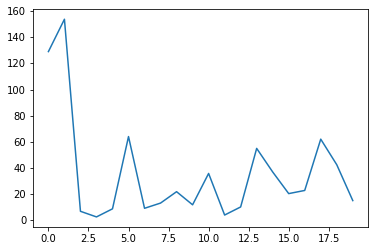

In [ ]:
# Esto significa que cometemos un error de unos 58€ al tratar de predecir una 
# vivienda.
y_pred = model.predict(X_test)
y_pred_denorm = y_pred[:, 0] * (y_reg_max - y_reg_min) + y_reg_min
y_test_denorm = y_test * (y_reg_max - y_reg_min) + y_reg_min
error_denorm = np.abs(y_pred_denorm - y_test_denorm)
plt.plot(range(y_pred.shape[0]), error_denorm)
print(f'Error medio absoluto: {error_denorm.mean()}')

In [ ]:
for gt, pred, e in zip(y_test_denorm, y_pred_denorm, error_denorm):
    print(f'Real: {gt:.2f} Predicho: {pred:.2f}. Error: {e:.2f}')

Real: 300.00 Predicho: 170.96. Error: 129.04
Real: 245.00 Predicho: 91.20. Error: 153.80
Real: 99.00 Predicho: 105.77. Error: 6.77
Real: 72.00 Predicho: 69.54. Error: 2.46
Real: 80.00 Predicho: 71.34. Error: 8.66
Real: 120.00 Predicho: 183.98. Error: 63.98
Real: 50.00 Predicho: 40.93. Error: 9.07
Real: 99.00 Predicho: 85.93. Error: 13.07
Real: 15.00 Predicho: 36.78. Error: 21.78
Real: 50.00 Predicho: 61.74. Error: 11.74
Real: 50.00 Predicho: 85.74. Error: 35.74
Real: 39.00 Predicho: 42.90. Error: 3.90
Real: 120.00 Predicho: 130.10. Error: 10.10
Real: 65.00 Predicho: 119.92. Error: 54.92
Real: 95.00 Predicho: 58.12. Error: 36.88
Real: 30.00 Predicho: 50.31. Error: 20.31
Real: 50.00 Predicho: 27.27. Error: 22.73
Real: 43.00 Predicho: 105.00. Error: 62.00
Real: 160.00 Predicho: 117.58. Error: 42.42
Real: 60.00 Predicho: 74.96. Error: 14.96


In [ ]:
print(f'Error absoluto: {np.mean(error_denorm)}')
print(f'Error cuadrático medio: {np.mean(error_denorm**2)}')

Error absoluto: 36.21713523864746
Error cuadrático medio: 2898.0126724037427


## Añadimos datos de imágenes

In [ ]:
# creamos un modelo para extraer el vector de características de nuestras imágenes
from keras.models import Model
from keras.layers import GlobalAveragePooling2D
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

model_base = VGG16(weights='imagenet', include_top=False)

# creamos un modelo añadiéndole la capa GlobalAveragePooling
x = model_base.output
gap = GlobalAveragePooling2D()(x)
model = Model(inputs=model_base.input, outputs=gap)

model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
______________________________________________________________

In [ ]:
# cuántas imágenes tenemos disponibles?
images.shape

(100, 224, 224, 3)

In [ ]:
from tqdm import tqdm  # para  mostrar el progreso
# vamos a procesarlas y a extraer el vector de 512 características
images_feat = np.zeros((n_images, 512))

for i in tqdm(range(images.shape[0])):
    img = images[i]
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x)
    images_feat[i] = features[0]


100%|██████████| 100/100 [00:55<00:00,  1.80it/s]


In [ ]:
images_feat.shape

(100, 512)

In [ ]:
data.shape

(100, 19)

In [ ]:
# Vamos a juntar las features de las imagenes y el dataset numérico/categórico
data_all = np.concatenate((data, images_feat), axis=1)
print(data_all.shape)

(100, 531)


## Clasificación con solo imágenes

In [ ]:
# Vamos a normalizar entre 0 y 1
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_norm = min_max_scaler.fit_transform(images_feat)
# en este caso no es necesario normalizar las etiquetas, ya que son valores de 0 a N_Clases. En regresión si los normalizaremos

In [ ]:
# convertimos las etiquetas a onehot
from keras.utils import to_categorical
y_class_onehot = to_categorical(y_class)

# Vamos a dividir en train y en test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_norm, y_class_onehot, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
# Creamos un modelo para hacer primero clasificación con y_class
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

# sparse_categorical_crossentropy es exactamente igual que categorical_crossentropy,
# solo que admite enteros en vez de onehot a la entrada
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=50,
          batch_size=8)

loss, acc = model.evaluate(X_test, y_test)
print(f'Loss={loss}, Acc={acc}')

Epoch 1/50
9/9 [==============================] - 1s 26ms/step - loss: 0.9790 - accuracy: 0.3060 - val_loss: 0.7875 - val_accuracy: 0.3750
Epoch 2/50
9/9 [==============================] - 0s 6ms/step - loss: 0.7141 - accuracy: 0.7471 - val_loss: 0.7869 - val_accuracy: 0.3750
Epoch 3/50
9/9 [==============================] - 0s 28ms/step - loss: 0.6464 - accuracy: 0.7110 - val_loss: 0.7855 - val_accuracy: 0.2500
Epoch 4/50
9/9 [==============================] - 0s 7ms/step - loss: 0.5574 - accuracy: 0.8826 - val_loss: 0.8163 - val_accuracy: 0.2500
Epoch 5/50
9/9 [==============================] - 0s 7ms/step - loss: 0.4881 - accuracy: 0.9164 - val_loss: 0.8483 - val_accuracy: 0.1250
Epoch 6/50
9/9 [==============================] - 0s 6ms/step - loss: 0.4747 - accuracy: 0.9258 - val_loss: 0.8649 - val_accuracy: 0.1250
Epoch 7/50
9/9 [==============================] - 0s 6ms/step - loss: 0.3689 - accuracy: 0.9392 - val_loss: 0.8848 - val_accuracy: 0.1250
Epoch 8/50
9/9 [================

Fijaos que existe un overfitting importante. Vamos a tratar de mejorarlo añadiendo Dropout.

In [ ]:
# Creamos un modelo para hacer primero clasificación con y_class
from keras.models import Sequential
from keras.layers import Dense, Dropout


model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))

# sparse_categorical_crossentropy es exactamente igual que categorical_crossentropy,
# solo que admite enteros en vez de onehot a la entrada
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=50,
          batch_size=8)

loss, acc = model.evaluate(X_test, y_test)
print(f'Loss={loss}, Acc={acc}')

Epoch 1/50
9/9 [==============================] - 1s 51ms/step - loss: 1.1104 - accuracy: 0.4240 - val_loss: 0.8969 - val_accuracy: 0.5000
Epoch 2/50
9/9 [==============================] - 0s 6ms/step - loss: 0.8834 - accuracy: 0.5624 - val_loss: 0.8307 - val_accuracy: 0.5000
Epoch 3/50
9/9 [==============================] - 0s 6ms/step - loss: 0.8354 - accuracy: 0.5659 - val_loss: 0.7949 - val_accuracy: 0.5000
Epoch 4/50
9/9 [==============================] - 0s 6ms/step - loss: 0.7455 - accuracy: 0.6440 - val_loss: 0.7691 - val_accuracy: 0.7500
Epoch 5/50
9/9 [==============================] - 0s 8ms/step - loss: 0.8488 - accuracy: 0.4794 - val_loss: 0.7744 - val_accuracy: 0.7500
Epoch 6/50
9/9 [==============================] - 0s 6ms/step - loss: 0.7913 - accuracy: 0.5838 - val_loss: 0.7972 - val_accuracy: 0.7500
Epoch 7/50
9/9 [==============================] - 0s 6ms/step - loss: 0.6614 - accuracy: 0.7166 - val_loss: 0.8238 - val_accuracy: 0.6250
Epoch 8/50
9/9 [=================

Vamos a probar añadiendo regularización L1 para que ayude a la red a escoger las mejores características de nuestro vector de 512 elementos.

In [ ]:
# Creamos un modelo para hacer primero clasificación con y_class
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l1


model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=l1(0.003)))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))

# sparse_categorical_crossentropy es exactamente igual que categorical_crossentropy,
# solo que admite enteros en vez de onehot a la entrada
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=200,
          batch_size=8)

loss, acc = model.evaluate(X_test, y_test)
print(f'Loss={loss}, Acc={acc}')

Epoch 1/200
9/9 [==============================] - 1s 28ms/step - loss: 8.4289 - accuracy: 0.4138 - val_loss: 7.8129 - val_accuracy: 0.5000
Epoch 2/200
9/9 [==============================] - 0s 6ms/step - loss: 7.7607 - accuracy: 0.5817 - val_loss: 7.2198 - val_accuracy: 0.5000
Epoch 3/200
9/9 [==============================] - 0s 6ms/step - loss: 7.1294 - accuracy: 0.5523 - val_loss: 6.6948 - val_accuracy: 0.5000
Epoch 4/200
9/9 [==============================] - 0s 6ms/step - loss: 6.5675 - accuracy: 0.6393 - val_loss: 6.1972 - val_accuracy: 0.5000
Epoch 5/200
9/9 [==============================] - 0s 6ms/step - loss: 6.0607 - accuracy: 0.6566 - val_loss: 5.7193 - val_accuracy: 0.5000
Epoch 6/200
9/9 [==============================] - 0s 7ms/step - loss: 5.6681 - accuracy: 0.5887 - val_loss: 5.2944 - val_accuracy: 0.5000
Epoch 7/200
9/9 [==============================] - 0s 7ms/step - loss: 5.1966 - accuracy: 0.6645 - val_loss: 4.8899 - val_accuracy: 0.5000
Epoch 8/200
9/9 [=========

Concluimos que con estos datos es complicado obtener mejores resultados. Vamos a probar combinando.

## Regresión con solo imágenes

In [ ]:
# Normalizamos datos y etiquetas (en esta ocasión las etiquetas son los precios 
# y vamos a normalizarlos también entre 0 y 1)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_norm = min_max_scaler.fit_transform(images_feat)
y_reg_norm = (y_reg - y_reg.min()) / (y_reg.max() - y_reg.min()) # esto es lo que hace "under the hood" el min_max_scaler
# en este caso no es necesario normalizar las etiquetas, ya que son valores de 
# 0 a N_Clases. En regresión si los normalizaremos

In [ ]:
# Vamos a dividir en train y en test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_norm, y_reg_norm.values, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
# Creamos un modelo para hacer primero clasificación con y_class
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # sin funcion de act y solo 1 neurona

# sparse_categorical_crossentropy es exactamente igual que categorical_crossentropy,
# solo que admite enteros en vez de onehot a la entrada
model.compile(loss='mean_squared_error', optimizer='RMSProp')

model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=50,
          batch_size=8)

loss = model.evaluate(X_test, y_test)
print(f'Loss={loss}')

Epoch 1/50
9/9 [==============================] - 1s 21ms/step - loss: 0.1238 - val_loss: 0.0052
Epoch 2/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0185 - val_loss: 0.0075
Epoch 3/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0106 - val_loss: 0.0073
Epoch 4/50
9/9 [==============================] - 0s 31ms/step - loss: 0.0114 - val_loss: 0.0089
Epoch 5/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0044 - val_loss: 0.0163
Epoch 6/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0067 - val_loss: 0.0144
Epoch 7/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0028 - val_loss: 0.0241
Epoch 8/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0043 - val_loss: 0.0174
Epoch 9/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0038 - val_loss: 0.0268
Epoch 10/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0056 - val_loss: 0.0168
Epoch 11/50
9/9 [====================

## Clasificación con todos los datos (numéricos + imágenes)

In [ ]:
# Vamos a normalizar entre 0 y 1
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_norm = min_max_scaler.fit_transform(data_all)
# en este caso no es necesario normalizar las etiquetas, ya que son valores de 0 a N_Clases. En regresión si los normalizaremos

In [ ]:
# convertimos las etiquetas a onehot
from keras.utils import to_categorical
y_class_onehot = to_categorical(y_class)

# Vamos a dividir en train y en test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_norm, y_class_onehot, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
# Creamos un modelo para hacer primero clasificación con y_class
from keras.models import Sequential
from keras.layers import Dense, Dropout


model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))

# sparse_categorical_crossentropy es exactamente igual que categorical_crossentropy,
# solo que admite enteros en vez de onehot a la entrada
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=50,
          batch_size=8)

loss, acc = model.evaluate(X_test, y_test)
print(f'Loss={loss}, Acc={acc}')

Epoch 1/50
9/9 [==============================] - 1s 53ms/step - loss: 1.0536 - accuracy: 0.4954 - val_loss: 1.0275 - val_accuracy: 0.5000
Epoch 2/50
9/9 [==============================] - 0s 6ms/step - loss: 0.9037 - accuracy: 0.5780 - val_loss: 0.9332 - val_accuracy: 0.5000
Epoch 3/50
9/9 [==============================] - 0s 6ms/step - loss: 0.8267 - accuracy: 0.5387 - val_loss: 0.9012 - val_accuracy: 0.5000
Epoch 4/50
9/9 [==============================] - 0s 6ms/step - loss: 0.8207 - accuracy: 0.5674 - val_loss: 0.8777 - val_accuracy: 0.5000
Epoch 5/50
9/9 [==============================] - 0s 8ms/step - loss: 0.7682 - accuracy: 0.6446 - val_loss: 0.8401 - val_accuracy: 0.6250
Epoch 6/50
9/9 [==============================] - 0s 7ms/step - loss: 0.6982 - accuracy: 0.6442 - val_loss: 0.8514 - val_accuracy: 0.5000
Epoch 7/50
9/9 [==============================] - 0s 8ms/step - loss: 0.6746 - accuracy: 0.6350 - val_loss: 0.8938 - val_accuracy: 0.3750
Epoch 8/50
9/9 [=================

## Regresión con todos los datos (numéricos + imágenes)



In [ ]:
# Normalizamos datos y etiquetas (en esta ocasión las etiquetas son los precios 
# y vamos a normalizarlos también entre 0 y 1)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_norm = min_max_scaler.fit_transform(data_all)
y_reg_norm = (y_reg - y_reg.min()) / (y_reg.max() - y_reg.min()) # esto es lo que hace "under the hood" el min_max_scaler
# en este caso no es necesario normalizar las etiquetas, ya que son valores de 
# 0 a N_Clases. En regresión si los normalizaremos

In [ ]:
# Vamos a dividir en train y en test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_norm, y_reg_norm.values, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
# Creamos un modelo para hacer primero clasificación con y_class
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # sin funcion de act y solo 1 neurona

# sparse_categorical_crossentropy es exactamente igual que categorical_crossentropy,
# solo que admite enteros en vez de onehot a la entrada
model.compile(loss='mean_squared_error', optimizer='RMSProp')

model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=50,
          batch_size=8)

Epoch 1/50
9/9 [==============================] - 1s 23ms/step - loss: 0.0647 - val_loss: 0.0274
Epoch 2/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0300 - val_loss: 0.0103
Epoch 3/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0094 - val_loss: 0.0110
Epoch 4/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0113 - val_loss: 0.0092
Epoch 5/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0044 - val_loss: 0.0158
Epoch 6/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0100 - val_loss: 0.0139
Epoch 7/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0104 - val_loss: 0.0099
Epoch 8/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0046 - val_loss: 0.0120
Epoch 9/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0024 - val_loss: 0.0104
Epoch 10/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0029 - val_loss: 0.0163
Epoch 11/50
9/9 [=====================

In [ ]:
loss = model.evaluate(X_test, y_test)
print(f'Loss={loss}')

1/1 [==============================] - 0s 90ms/step - loss: 0.0513
Loss=0.051300667226314545


In [ ]:
# Para tener una intuición real de cómo de bueno es nuestro modelo, tenemos que
# reescalar las predicciones y calcular el error nosotros mismos. 
# El reescalado es necesario por el min_max normalizado que hacemos para tener 
# los datos de 0 a 1. 
y_reg_min = y_reg.min()
y_reg_max = y_reg.max()

Error medio absoluto: 37.95962200164795


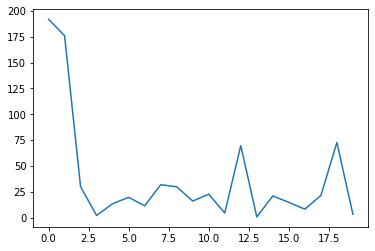

In [ ]:
# Esto significa que cometemos un error de unos 58€ al tratar de predecir una 
# vivienda.
y_pred = model.predict(X_test)
y_pred_denorm = y_pred[:, 0] * (y_reg_max - y_reg_min) + y_reg_min
y_test_denorm = y_test * (y_reg_max - y_reg_min) + y_reg_min
error_denorm = np.abs(y_pred_denorm - y_test_denorm)
plt.plot(range(y_pred.shape[0]), error_denorm)
print(f'Error medio absoluto: {error_denorm.mean()}')

In [ ]:
for gt, pred, e in zip(y_test_denorm, y_pred_denorm, error_denorm):
    print(f'Real: {gt:.2f} Predicho: {pred:.2f}. Error: {e:.2f}')

Real: 300.00 Predicho: 108.14. Error: 191.86
Real: 245.00 Predicho: 69.03. Error: 175.97
Real: 99.00 Predicho: 69.14. Error: 29.86
Real: 72.00 Predicho: 70.05. Error: 1.95
Real: 80.00 Predicho: 66.62. Error: 13.38
Real: 120.00 Predicho: 100.44. Error: 19.56
Real: 50.00 Predicho: 61.31. Error: 11.31
Real: 99.00 Predicho: 67.23. Error: 31.77
Real: 15.00 Predicho: 44.78. Error: 29.78
Real: 50.00 Predicho: 65.92. Error: 15.92
Real: 50.00 Predicho: 27.41. Error: 22.59
Real: 39.00 Predicho: 34.67. Error: 4.33
Real: 120.00 Predicho: 50.41. Error: 69.59
Real: 65.00 Predicho: 64.41. Error: 0.59
Real: 95.00 Predicho: 74.14. Error: 20.86
Real: 30.00 Predicho: 44.75. Error: 14.75
Real: 50.00 Predicho: 58.06. Error: 8.06
Real: 43.00 Predicho: 64.27. Error: 21.27
Real: 160.00 Predicho: 87.38. Error: 72.62
Real: 60.00 Predicho: 56.83. Error: 3.17


In [ ]:
print(f'Error absoluto: {np.mean(error_denorm)}')
print(f'Error cuadrático medio: {np.mean(error_denorm**2)}')

Error absoluto: 37.95962200164795
Error cuadrático medio: 4166.896847657461
